In [2]:
import os
import pandas as pd
import nltk
import string
import warnings
warnings.filterwarnings("ignore")

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

base_dir = 'gutenberg_bookshelf_data'
genres = ["Fantasy", "Mystery_Fiction", "Science_Fiction", "Crime_Fiction", "Gothic_Fiction", "Horror", "Romantic_Fiction", "Detective_Fiction"]

books = []
for genre in genres:
    genre_path = os.path.join(base_dir, genre, "cleaned")  # Navigate to the 'cleaned' subdirectory
    for file_name in os.listdir(genre_path):
        if file_name.endswith(".txt"):  # Ensure it's a .txt file
            with open(os.path.join(genre_path, file_name), 'r', encoding='utf-8') as f:
                text = f.read()
                books.append({
                    'Title': file_name,
                    'Genre': genre,
                    'Text': text
                })
# Load your dataset (replace with your file path or structure)
# Example dataset structure: df = pd.DataFrame({'Title': ['Novel1', 'Novel2'], 'Text': ['Text1', 'Text2']})
df = pd.DataFrame(books)  # Replace 'novels.csv' with your dataset file

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\curti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\curti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\curti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from textblob import TextBlob
import numpy as np

def extract_features(text):
    blob = TextBlob(text)
    words = blob.words
    sentences = blob.sentences
    return {
        'avg_word_length': np.mean([len(word) for word in words]),
        'vocabulary_richness': len(set(words)) / len(words),
        'avg_sentence_length': np.mean([len(sentence.words) for sentence in sentences]),
        'punctuation_frequency': sum([1 for char in text if char in string.punctuation]) / len(text),
    }

# Apply feature extraction
features = df['Text'].apply(extract_features)
df_features = pd.DataFrame(features.tolist())


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=100)  # Adjust based on dataset size
tfidf_matrix = vectorizer.fit_transform(df['Text']).toarray()
tfidf_df = pd.DataFrame(tfidf_matrix, columns=vectorizer.get_feature_names_out())
# Combine linguistic/syntactic and semantic features
final_features = pd.concat([df_features, tfidf_df], axis=1)
final_features.drop(columns='gutenberg', inplace=True)

In [52]:
final_features

,avg_word_length,vocabulary_richness,avg_sentence_length,punctuation_frequency,about,after,again,all,an,and,...,were,what,when,which,who,will,with,would,you,your
0,4.220951,0.112614,16.943362,0.040971,0.015158,0.015377,0.016714,0.052725,0.014280,0.356774,...,0.053930,0.022189,0.032514,0.024605,0.019552,0.029878,0.077770,0.020279,0.125222,0.022408
1,4.093317,0.058205,19.858307,0.032955,0.016490,0.010418,0.010881,0.067271,0.012210,0.445163,...,0.034264,0.029955,0.042622,0.045760,0.066472,0.063505,0.088382,0.044393,0.126668,0.028072
2,4.105569,0.103343,19.129706,0.037623,0.012670,0.008617,0.014605,0.041178,0.029516,0.471102,...,0.045422,0.031244,0.035995,0.023469,0.024189,0.035419,0.083652,0.043669,0.085524,0.022317
3,4.050414,0.040761,26.188502,0.028033,0.003798,0.018629,0.010982,0.060480,0.022786,0.619145,...,0.036454,0.020859,0.034973,0.010260,0.003288,0.048294,0.103333,0.028232,0.051411,0.030212
4,4.040869,0.035097,25.249457,0.028385,0.005536,0.011633,0.012235,0.068908,0.027880,0.585668,...,0.040766,0.021799,0.042462,0.018883,0.003164,0.038755,0.084924,0.026977,0.061098,0.024568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,3.896949,0.088659,14.546432,0.036957,0.033524,0.016688,0.016373,0.051683,0.038646,0.251895,...,0.029126,0.053700,0.018469,0.015986,0.021108,0.024522,0.093587,0.037627,0.215267,0.026074
135,4.041528,0.131472,19.791481,0.029469,0.022071,0.008209,0.009453,0.049783,0.037276,0.307279,...,0.038807,0.029673,0.023543,0.060818,0.020109,0.025504,0.105941,0.033334,0.151310,0.028447
136,4.336166,0.118314,19.778733,0.036366,0.026135,0.011607,0.009601,0.041109,0.034611,0.323222,...,0.034536,0.027547,0.022038,0.035176,0.027406,0.017659,0.110754,0.019346,0.108353,0.014127
137,4.522208,0.125456,25.567671,0.027786,0.015074,0.007741,0.007741,0.038345,0.035330,0.285657,...,0.035074,0.020916,0.017241,0.076408,0.014415,0.015168,0.083097,0.017489,0.028264,0.003674


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(final_features)

Best k based on Silhouette Score: 2


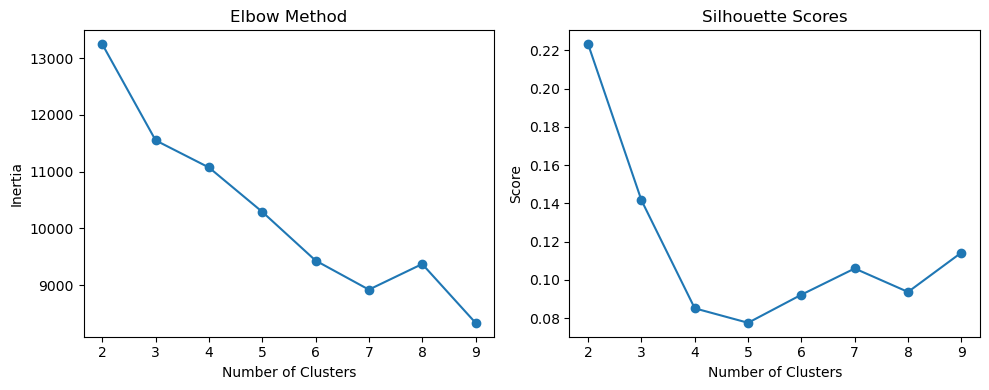

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters
inertia = []
silhouette_scores = []
best_k = None

for k in range(2, 10):  # Test for 2 to 9 clusters
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)  # Optionally store inertia for analysis
    
    # Compute silhouette score
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

    # Update the best k if we find a higher silhouette score
    if best_k is None or score > max(silhouette_scores[:-1]):
        best_k = k

print(f"Best k based on Silhouette Score: {best_k}")

# Plot elbow method and silhouette scores
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

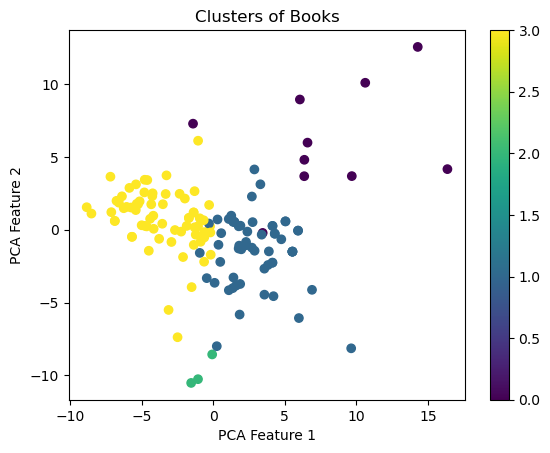

In [55]:
# Apply K-Means
optimal_k = 4  # Replace with chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters

from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Clusters of Books')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar()
plt.show()

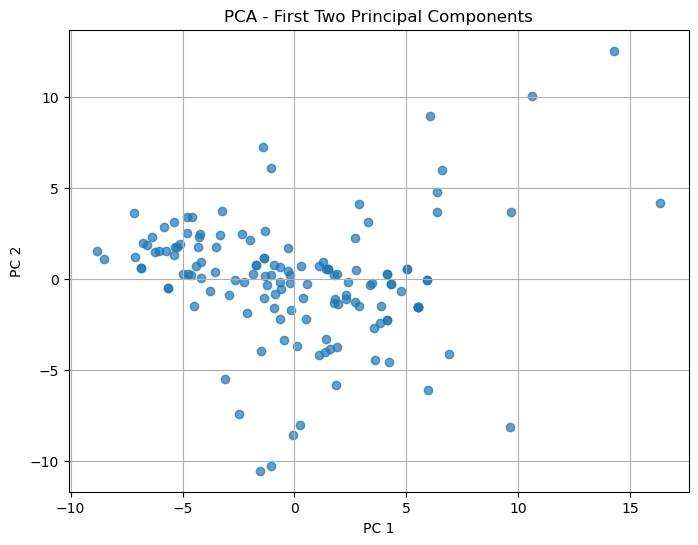

In [56]:
# Reduce dimensions to the first two components
pca_2d = PCA(n_components=2)
pca_features_2d = pca_2d.fit_transform(scaled_features)

# Plot the data in the 2D space
plt.figure(figsize=(8, 6))
plt.scatter(pca_features_2d[:, 0], pca_features_2d[:, 1], alpha=0.7)
plt.title('PCA - First Two Principal Components')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.show()


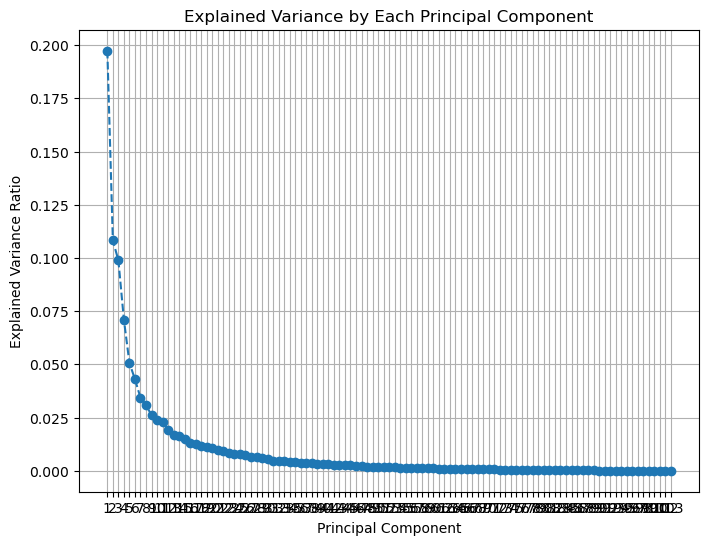

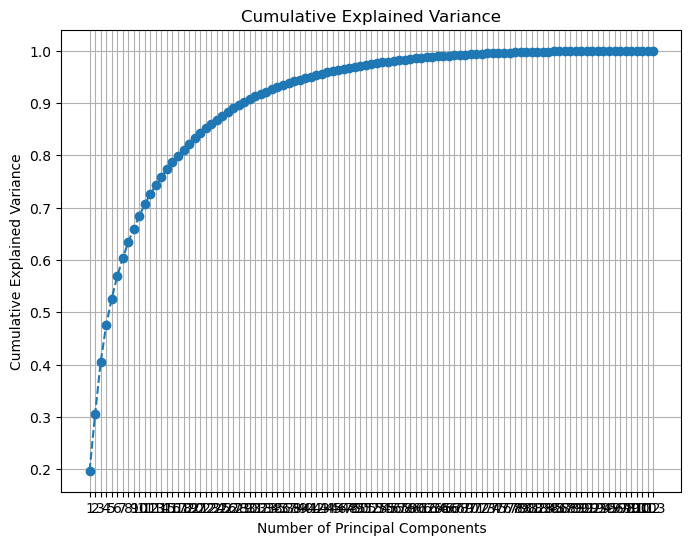

Variance explained by the first 2 components: 0.31


In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA to your scaled features
pca = PCA()
pca.fit(scaled_features)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()

# Print total variance explained by the first few components
print(f"Variance explained by the first 2 components: {cumulative_explained_variance[1]:.2f}")


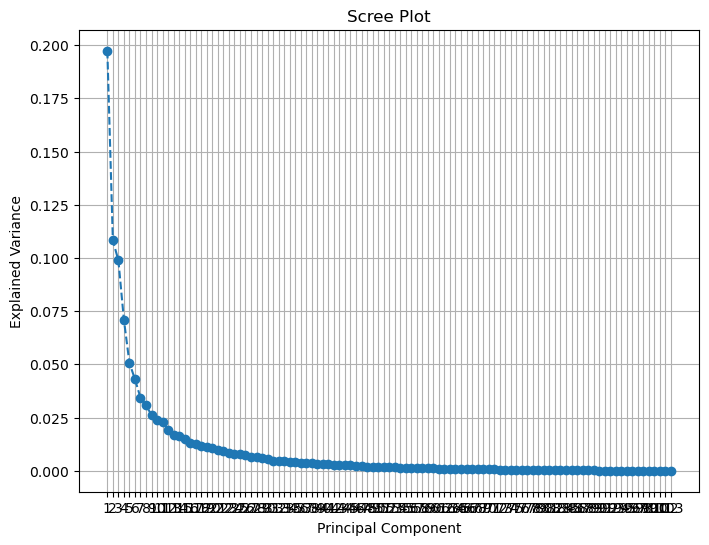

In [58]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()


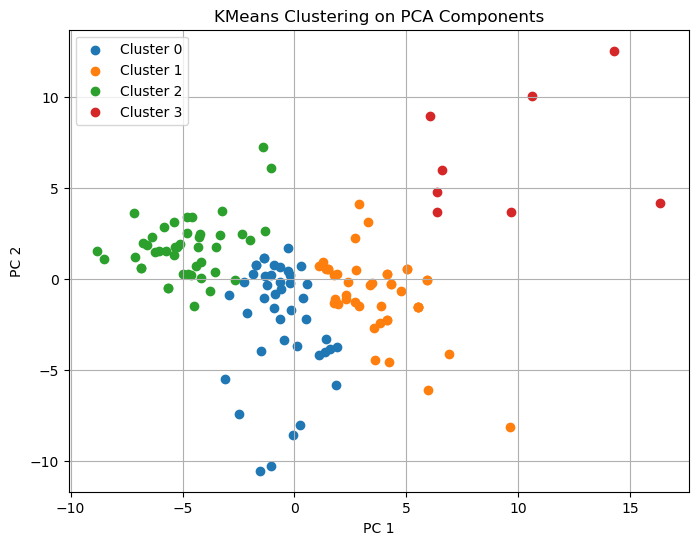

In [59]:
# Example: Apply KMeans clustering on the first 2 PCA components
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(pca_features_2d)

# Visualize clustering result on PCA space
plt.figure(figsize=(8, 6))
for cluster in np.unique(labels):
    plt.scatter(pca_features_2d[labels == cluster, 0], pca_features_2d[labels == cluster, 1], label=f'Cluster {cluster}')
    
plt.title('KMeans Clustering on PCA Components')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
for cluster in range(optimal_k):
    print(f"Cluster {cluster}:")
    print(df[df['Cluster'] == cluster][['Title', 'Genre']])
    print("\n\n")

Cluster 0:
                                                 Title             Genre
33                       2 B R 0 2 B Kurt Vonnegut.txt   Science_Fiction
36                                 Anthem Ayn Rand.txt   Science_Fiction
39            The Big Trip Up Yonder Kurt Vonnegut.txt   Science_Fiction
41                 The Eyes Have It Philip K. Dick.txt   Science_Fiction
52   With the Night Mail_ A Story of 2000 A.D. Rudy...   Science_Fiction
54   An African Millionaire_ Episodes in the Life o...     Crime_Fiction
83                   The Monkey's Paw W. W. Jacobs.txt    Gothic_Fiction
93   The Yellow Wallpaper Charlotte Perkins Gilman.txt    Gothic_Fiction
96   An Occurrence at Owl Creek Bridge Ambrose Bier...            Horror
117  Kun ruusu puhkeaa (Finnish) Louisa May Alcott.txt  Romantic_Fiction



Cluster 1:
                                                 Title              Genre
5                          Men of Iron Howard Pyle.txt            Fantasy
7                  The B

In [61]:
silhouette = silhouette_score(scaled_features, clusters)
print(f"K-means (n={optimal_k}) silhouette Score: {silhouette}")

K-means (n=4) silhouette Score: 0.1394252774115041


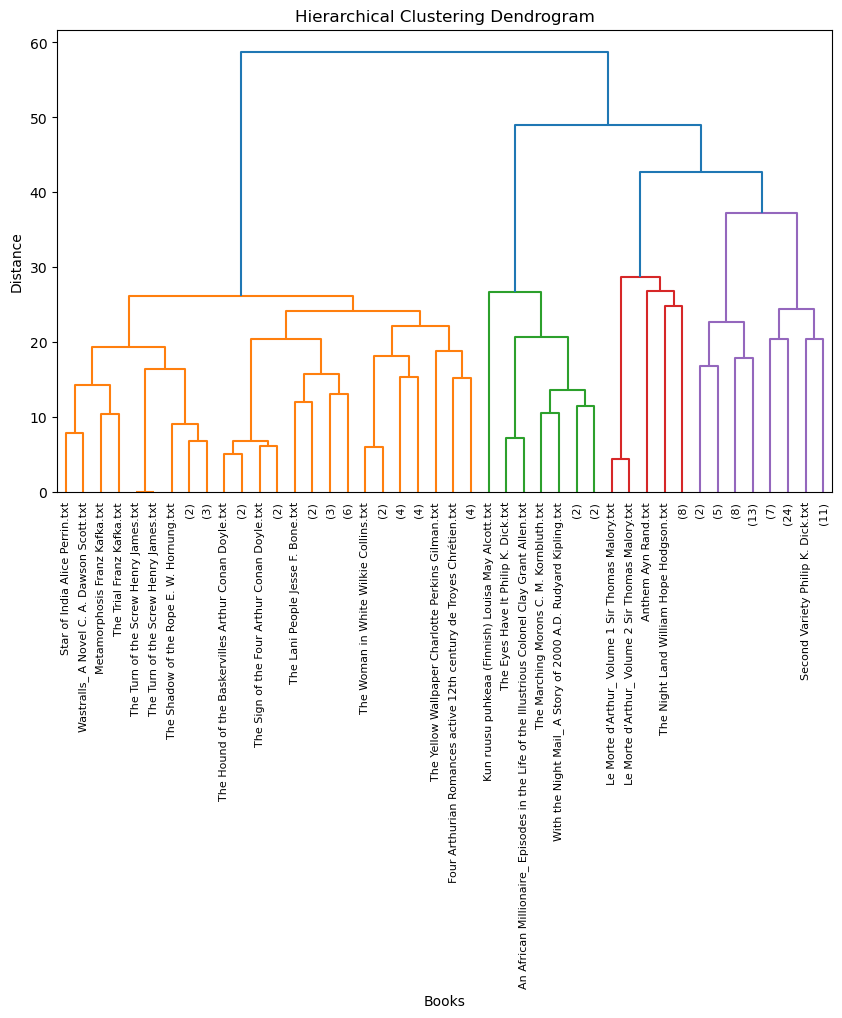

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Perform hierarchical clustering
linkage_matrix = linkage(scaled_features, method='ward')  # 'ward' minimizes variance

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5, labels=df['Title'].values)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Books')
plt.ylabel('Distance')
plt.show()

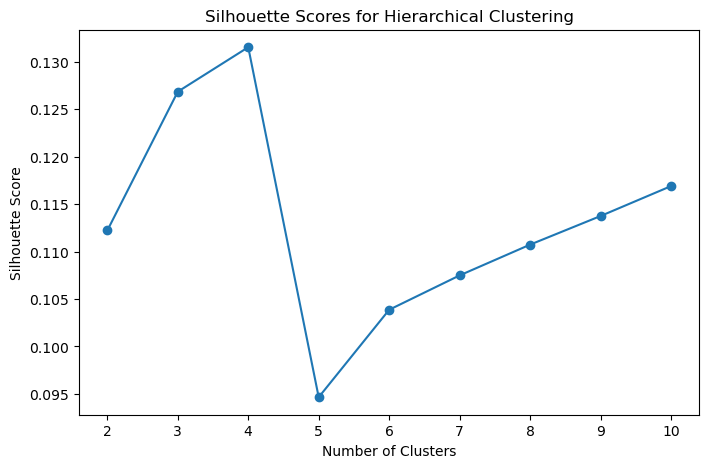

Optimal number of clusters based on Silhouette Score: 4


In [63]:
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    clusters = fcluster(linkage_matrix, t=k, criterion='maxclust')
    score = silhouette_score(scaled_features, clusters)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Best cluster number
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_clusters}")

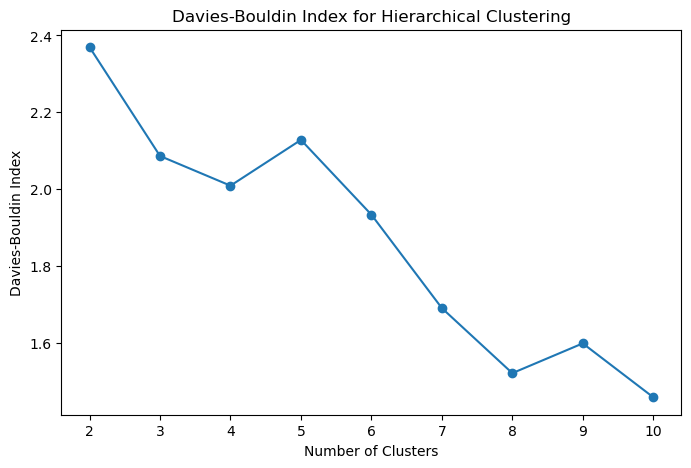

Optimal number of clusters based on Davies-Bouldin Index: 10


In [64]:
db_scores = []

for k in cluster_range:
    clusters = fcluster(linkage_matrix, t=k, criterion='maxclust')
    score = davies_bouldin_score(scaled_features, clusters)
    db_scores.append(score)

# Plot Davies-Bouldin Index
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Hierarchical Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

# Best cluster number
optimal_clusters_db = cluster_range[np.argmin(db_scores)]
print(f"Optimal number of clusters based on Davies-Bouldin Index: {optimal_clusters_db}")


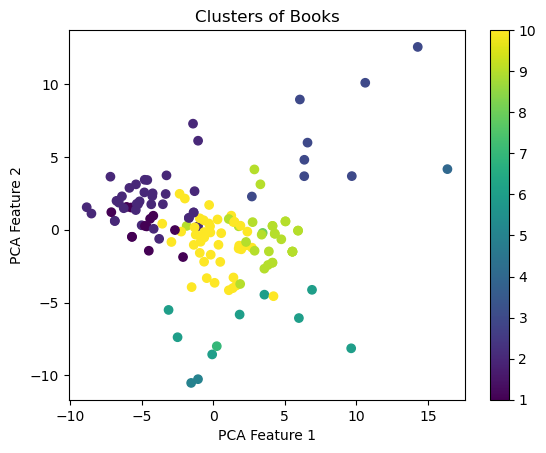

In [67]:
# Extract clusters (adjust 't' for the desired number of clusters)
num_clusters = 4
df['Cluster'] = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Clusters of Books')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar()
plt.show()

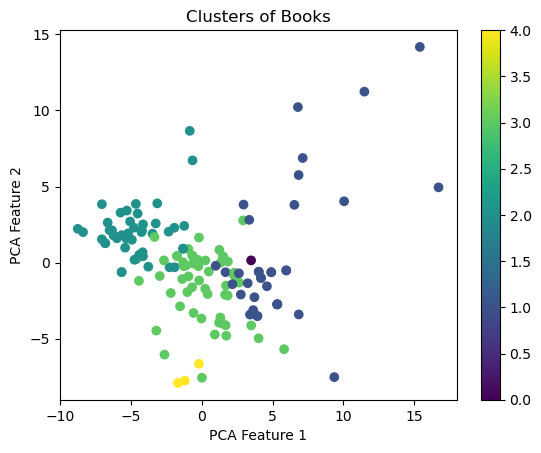

Silhouette Score: 0.1057610710543395


In [120]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=5)
clusters = gmm.fit_predict(scaled_features)
df['Cluster'] = clusters

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Clusters of Books')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar()
plt.show()

silhouette = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score: {silhouette}")

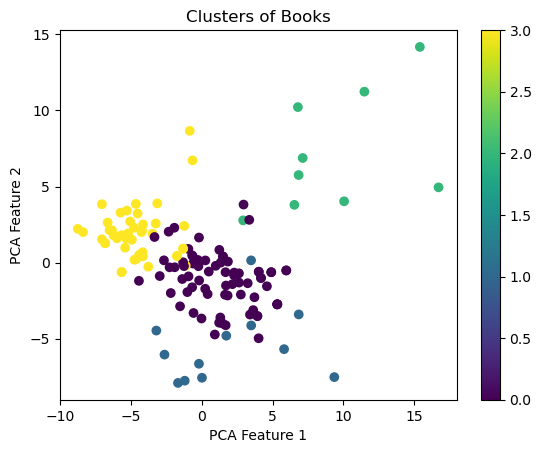

In [25]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clusters = agglo.fit_predict(scaled_features)
df['Cluster'] = clusters

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Clusters of Books')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar()
plt.show()

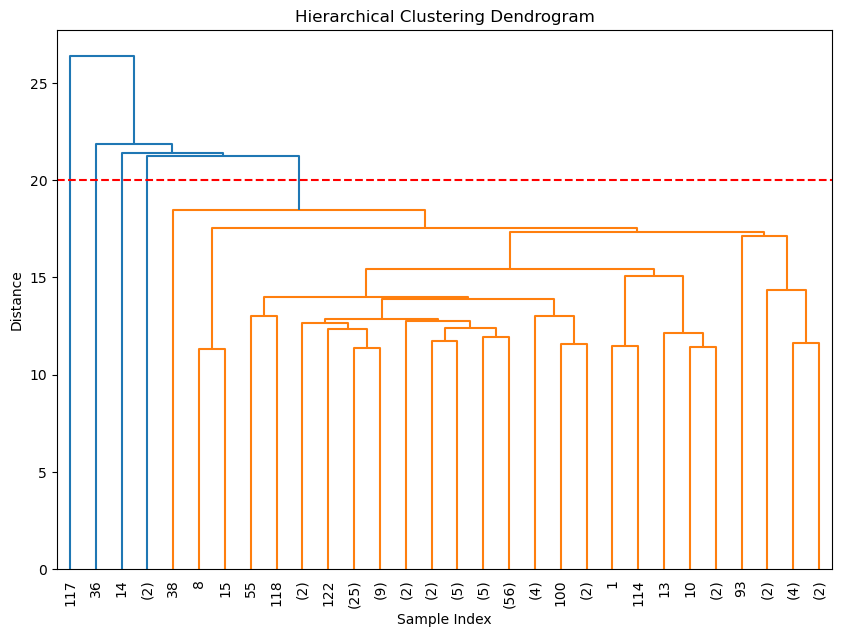

In [26]:
# Compute the linkage matrix
linkage_matrix = linkage(scaled_features, method='average')  # Replace 'ward' with desired linkage

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=20, color='r', linestyle='--')  # Example threshold
plt.show()


In [27]:
cluster_range = range(2, 11)  # Test different numbers of clusters
best_score = -1
best_k = None

for k in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')  # Replace 'ward' as needed
    labels = clustering.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Optimal number of clusters (Silhouette Score): {best_k}")


Optimal number of clusters (Silhouette Score): 4


In [28]:
best_score_db = np.inf
best_k_db = None

for k in cluster_range:
    clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')  # Replace 'ward' as needed
    labels = clustering.fit_predict(scaled_features)
    score = davies_bouldin_score(scaled_features, labels)
    if score < best_score_db:
        best_score_db = score
        best_k_db = k

print(f"Optimal number of clusters (Davies-Bouldin Index): {best_k_db}")


Optimal number of clusters (Davies-Bouldin Index): 8


In [29]:
linkage_methods = ['ward', 'complete', 'average', 'single']
best_score_linkage = -1
best_method = None

for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=best_k, linkage=method)
    labels = clustering.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    if score > best_score_linkage:
        best_score_linkage = score
        best_method = method

print(f"Optimal linkage method: {best_method}")


Optimal linkage method: average


In [30]:
final_clustering = AgglomerativeClustering(n_clusters=best_k, linkage=best_method)
labels = final_clustering.fit_predict(scaled_features)

# Add the labels to the dataset
df['Cluster'] = labels


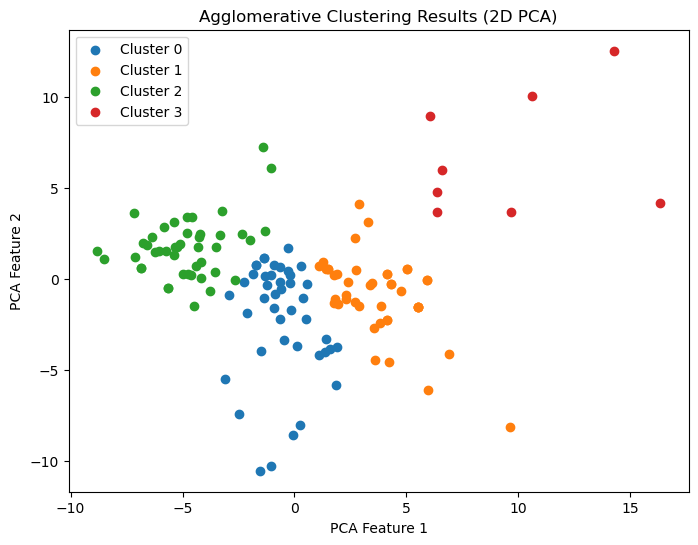

In [105]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
for cluster_id in np.unique(labels):
    mask = labels == cluster_id
    plt.scatter(
        pca_features[mask, 0],
        pca_features[mask, 1],
        label=f'Cluster {cluster_id}'
    )

plt.title('Agglomerative Clustering Results (2D PCA)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()


In [107]:
# Fit PCA to your data (assuming `scaled_features` contains the scaled data)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # You can change n_components to any number you need
pca.fit(scaled_features)

# Loading matrix
loadings = pca.components_

# Print the loadings for each component
print("Loadings matrix:")
loadings

Loadings matrix:


array([[ 0.16788275,  0.12771997,  0.06222606, -0.06609257, -0.07285756,
        -0.12608552, -0.1030098 , -0.06109865, -0.04640936, -0.03812435,
         0.07801538,  0.01411842, -0.12776827, -0.13052094, -0.0929317 ,
        -0.12380456, -0.08918984, -0.14384813,  0.09260578, -0.07450046,
        -0.09531477, -0.14756679, -0.11908678, -0.06216182, -0.09545324,
        -0.10758472, -0.10253954,  0.04939835, -0.12618256, -0.08312239,
        -0.16196956, -0.12167407, -0.0778086 , -0.12131177, -0.07335995,
        -0.0957755 , -0.0855985 , -0.02402575, -0.07967044, -0.04459332,
        -0.1675395 ,  0.07909523, -0.16583819, -0.09332655, -0.09964694,
        -0.10116585, -0.08907058,  0.04065437, -0.10988812, -0.08687632,
        -0.04442473, -0.05651017, -0.05218056, -0.04643047, -0.07583229,
        -0.11092219,  0.11501003,  0.0411511 , -0.1287218 , -0.10774755,
         0.10478667,  0.03639723,  0.00062219, -0.15286245, -0.1184611 ,
        -0.08384361, -0.16429474, -0.02674275, -0.0

In [109]:
import numpy as np

# Get the feature names (assuming you have a DataFrame)
feature_names = scaled_features.columns

# Get the loadings for the first principal component
pc1_loadings = loadings[0]

# Get the indices of the features sorted by their absolute loading values (descending order)
sorted_indices = np.argsort(np.abs(pc1_loadings))[::-1]

# Print the most influential features for the first principal component
print("Most influential features for the first principal component:")
for idx in sorted_indices[:5]:  # Display top 5 features
    print(f"{feature_names[idx]}: {pc1_loadings[idx]}")


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [110]:
scaled_features

array([[-0.1721105 , -0.12042968, -0.80220556, ..., -0.49682856,
         0.19648447,  0.088399  ],
       [-0.63503023, -1.11281848, -0.3015777 , ...,  1.57734343,
         0.21983027,  0.56959714],
       [-0.59059088, -0.28952681, -0.42671143, ...,  1.51511594,
        -0.44470012,  0.08063977],
       ...,
       [ 0.24576542, -0.016451  , -0.31524409, ..., -0.57713855,
        -0.07598244, -0.61515064],
       [ 0.92052208,  0.11380223,  0.67897809, ..., -0.73681949,
        -1.36952812, -1.50314865],
       [-1.0500057 ,  0.00486224, -0.03057042, ..., -0.19597992,
         1.74741631,  1.63308694]])

In [47]:
import matplotlib.pyplot as plt

# Plot loadings for the first principal component
plt.figure(figsize=(10, 6))
plt.barh(feature_names, pc1_loadings)
plt.title('Loadings of Features on the First Principal Component')
plt.xlabel('Loading Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


NameError: name 'feature_names' is not defined

<Figure size 1000x600 with 0 Axes>

In [48]:
for i, component_loadings in enumerate(loadings):
    sorted_indices = np.argsort(np.abs(component_loadings))[::-1]
    print(f"Top features for Principal Component {i+1}:")
    for idx in sorted_indices[:5]:
        print(f"{feature_names[idx]}: {component_loadings[idx]}")
    print("-" * 50)


Top features for Principal Component 1:


NameError: name 'feature_names' is not defined

In [ ]:
for i, component_loadings in enumerate(loadings):
    sorted_indices = np.argsort(np.abs(component_loadings))[::-1]
    print(f"Top features for Principal Component {i+1}:")
    for idx in sorted_indices[:5]:
        print(f"{feature_names[idx]}: {component_loadings[idx]}")
    print("-" * 50)


In [113]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you have a DataFrame called df_features
# Replace with your actual DataFrame

# Step 1: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)  # Scaled data is now a NumPy array

# Step 2: Convert the scaled data back into a DataFrame, retaining the column names
scaled_features_df = pd.DataFrame(scaled_features, columns=df.columns)

# Step 3: Perform PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca.fit(scaled_features_df)

# Step 4: Get the loadings for the first principal component
pc1_loadings = pca.components_[0]

# Step 5: Get the indices of the features sorted by their absolute loading values (descending order)
sorted_indices = np.argsort(np.abs(pc1_loadings))[::-1]

# Step 6: Print the most influential features for the first principal component
print("Most influential features for the first principal component:")
for idx in sorted_indices[:5]:  # Display top 5 features
    print(f"{scaled_features_df.columns[idx]}: {pc1_loadings[idx]}")


ValueError: could not convert string to float: 'Dorothy and the Wizard in Oz L. Frank Baum.txt'

In [114]:
import os
import pandas as pd
import nltk
import string
import warnings
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# Ignoring warnings
warnings.filterwarnings("ignore")

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Directories and genres
base_dir = 'gutenberg_bookshelf_data'
genres = ["Fantasy", "Mystery_Fiction", "Science_Fiction", "Crime_Fiction", "Gothic_Fiction", "Horror", "Romantic_Fiction", "Detective_Fiction"]

# List to store book data
books = []
for genre in genres:
    genre_path = os.path.join(base_dir, genre, "cleaned")  # Navigate to the 'cleaned' subdirectory
    for file_name in os.listdir(genre_path):
        if file_name.endswith(".txt"):  # Ensure it's a .txt file
            with open(os.path.join(genre_path, file_name), 'r', encoding='utf-8') as f:
                text = f.read()
                books.append({
                    'Title': file_name,
                    'Genre': genre,
                    'Text': text
                })

# Create a DataFrame
df = pd.DataFrame(books)

# Feature extraction function
def extract_features(text):
    blob = TextBlob(text)
    words = blob.words
    sentences = blob.sentences
    return {
        'avg_word_length': np.mean([len(word) for word in words]),
        'vocabulary_richness': len(set(words)) / len(words),
        'avg_sentence_length': np.mean([len(sentence.words) for sentence in sentences]),
        'punctuation_frequency': sum([1 for char in text if char in string.punctuation]) / len(text),
    }

# Apply feature extraction
features = df['Text'].apply(extract_features)
df_features = pd.DataFrame(features.tolist())

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=100)  # Adjust based on dataset size
tfidf_matrix = vectorizer.fit_transform(df['Text']).toarray()
tfidf_df = pd.DataFrame(tfidf_matrix, columns=vectorizer.get_feature_names_out())

# Combine linguistic/syntactic and semantic features
final_features = pd.concat([df_features, tfidf_df], axis=1)

# Standardizing features before PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(final_features)

# Perform PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca.fit(scaled_features)

# Get PCA component loadings (contributions of each feature to the components)
pc_loadings = pca.components_

# Print the most influential features for the first principal component
print("Most influential features for the first principal component:")
pc1_loadings = pc_loadings[0]
sorted_indices = np.argsort(np.abs(pc1_loadings))[::-1]
for idx in sorted_indices[:5]:  # Display top 5 features
    print(f"{final_features.columns[idx]}: {pc1_loadings[idx]}")

# Optionally, to visualize the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio for each component: {explained_variance_ratio}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\curti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\curti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\curti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Most influential features for the first principal component:
avg_word_length: 0.16875966723826133
it: -0.1642017469427451
what: -0.16257545218665095
know: -0.16204180058194997
see: -0.15989695584221192
Explained variance ratio for each component: [0.19801881 0.11127133]


In [122]:
import re
import numpy as np
import pandas as pd
from textstat.textstat import textstat

# Function to extract stylistic features from a book
def extract_stylistic_features(texts):
    features = {
        'avg_sentence_length': [],
        'avg_word_length': [],
        'avg_syllables_per_word': [],
        'readability_score': [],
        'passive_voice_ratio': []
    }
    
    for text in texts:
        sentences = re.split(r'[.!?]', text)
        words = text.split()
        num_sentences = len(sentences)
        num_words = len(words)
        num_syllables = sum(textstat.syllable_count(word) for word in words)
        passive_voice = len(re.findall(r'\b(is|are|was|were|be|been|being)\s+\w+\s+\w+\b', text))  # very basic passive voice check
        
        features['avg_sentence_length'].append(num_words / num_sentences if num_sentences > 0 else 0)
        features['avg_word_length'].append(np.mean([len(word) for word in words]) if num_words > 0 else 0)
        features['avg_syllables_per_word'].append(num_syllables / num_words if num_words > 0 else 0)
        features['readability_score'].append(textstat.flesch_reading_ease(text))
        features['passive_voice_ratio'].append(passive_voice / num_sentences if num_sentences > 0 else 0)
    
    return features

# Assuming `df_books` is your DataFrame containing book text and k-means cluster labels
# Extract stylistic features for each book
stylistic_features = extract_stylistic_features(df['Text'])

# Convert the extracted features into a DataFrame for easier processing
stylistic_features_df = pd.DataFrame(stylistic_features)

# Add the cluster labels from k-means (assuming they are in a column 'cluster_label')
stylistic_features_df['cluster_label'] = df['Cluster'].values

# Group by the cluster labels and calculate the average of each stylistic feature per cluster
stylistic_features_per_cluster = stylistic_features_df.groupby('cluster_label').mean()

# Print the average stylistic features per cluster
for cluster, features in stylistic_features_per_cluster.iterrows():
    print(f"Cluster {cluster}:")
    for feature, value in features.items():
        print(f"  {feature}: {value:.2f}")


Cluster 0:
  avg_sentence_length: 14.19
  avg_word_length: 4.24
  avg_syllables_per_word: 1.22
  readability_score: 88.77
  passive_voice_ratio: 0.41
Cluster 1:
  avg_sentence_length: 19.14
  avg_word_length: 4.81
  avg_syllables_per_word: 1.41
  readability_score: 64.75
  passive_voice_ratio: 0.48
Cluster 2:
  avg_sentence_length: 14.43
  avg_word_length: 4.50
  avg_syllables_per_word: 1.31
  readability_score: 79.53
  passive_voice_ratio: 0.41
Cluster 3:
  avg_sentence_length: 16.76
  avg_word_length: 4.55
  avg_syllables_per_word: 1.32
  readability_score: 76.19
  passive_voice_ratio: 0.43
Cluster 4:
  avg_sentence_length: 24.97
  avg_word_length: 4.26
  avg_syllables_per_word: 1.19
  readability_score: 77.81
  passive_voice_ratio: 0.54


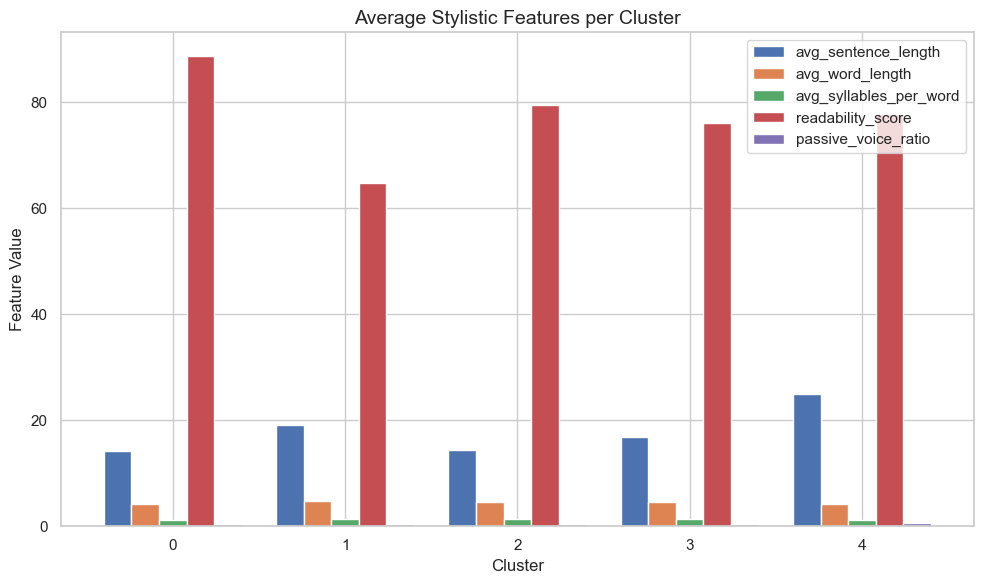

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Plot average stylistic features per cluster
#stylistic_features_per_cluster = stylistic_features_per_cluster.drop('cluster_label', axis=1)

# Create a barplot for each feature
stylistic_features_per_cluster.plot(kind='bar', figsize=(10, 6), width=0.8)

# Title and labels
plt.title('Average Stylistic Features per Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Feature Value', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


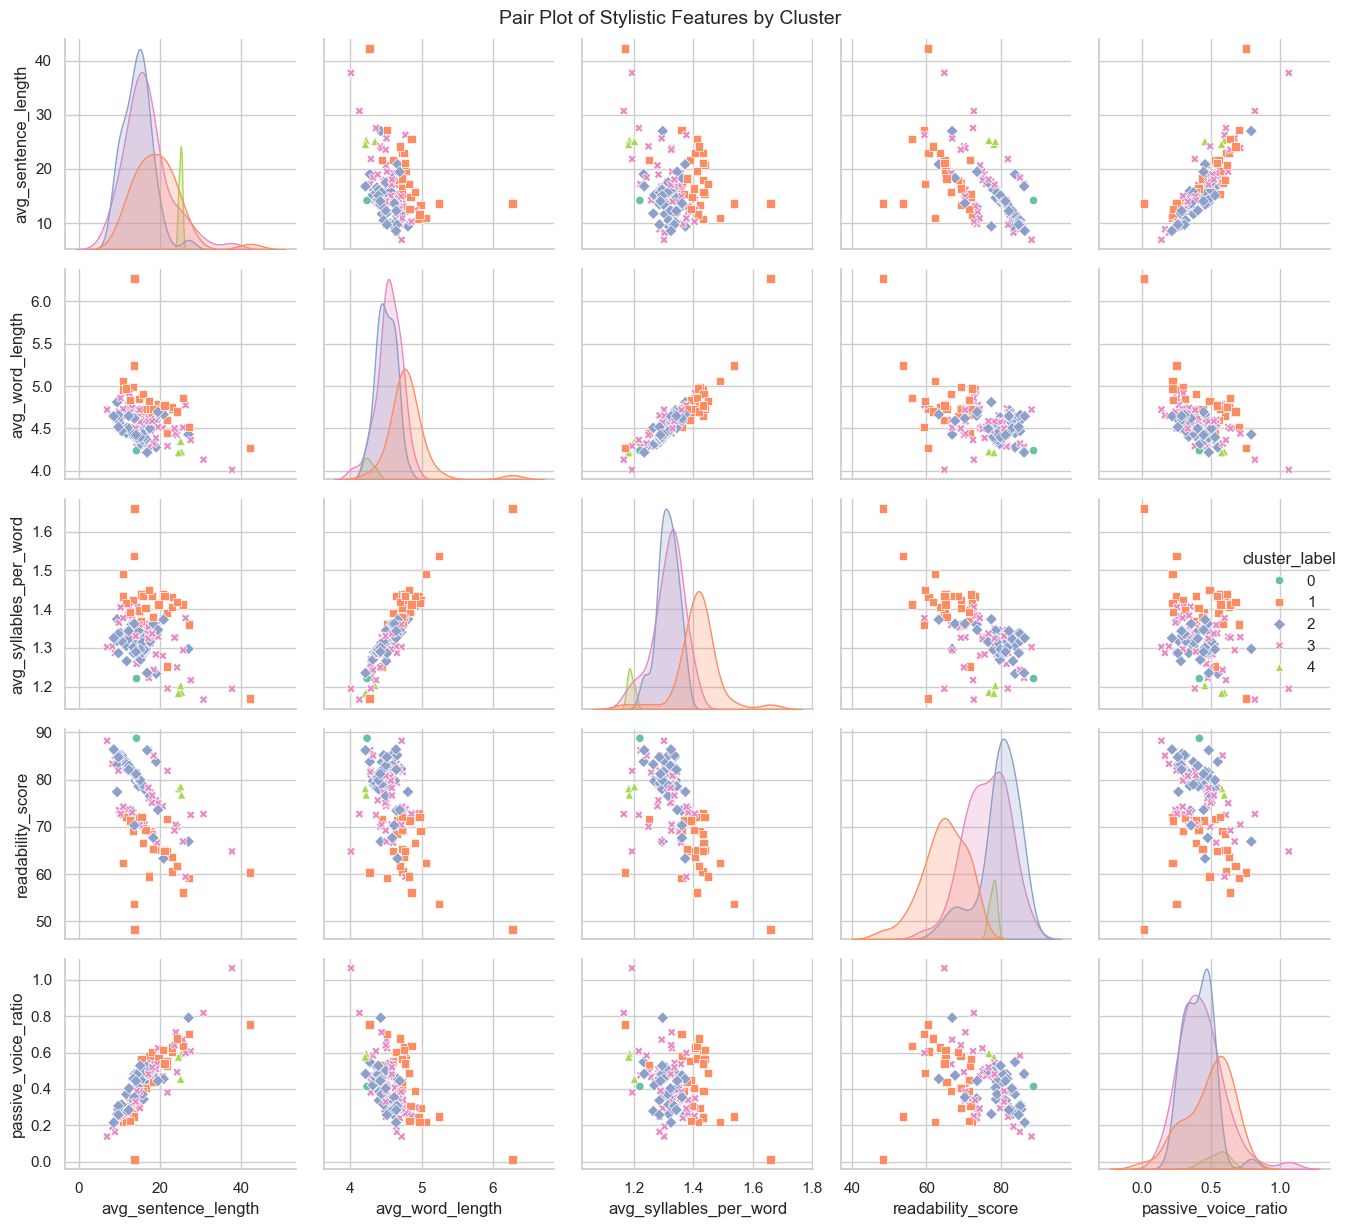

In [128]:
# Create a pair plot for the stylistic features (without cluster labels)
sns.pairplot(stylistic_features_df, hue='cluster_label', palette='Set2', markers=["o", "s", "D", "X", "^"])

# Title and show the plot
plt.suptitle('Pair Plot of Stylistic Features by Cluster', fontsize=14)
plt.tight_layout()
plt.show()

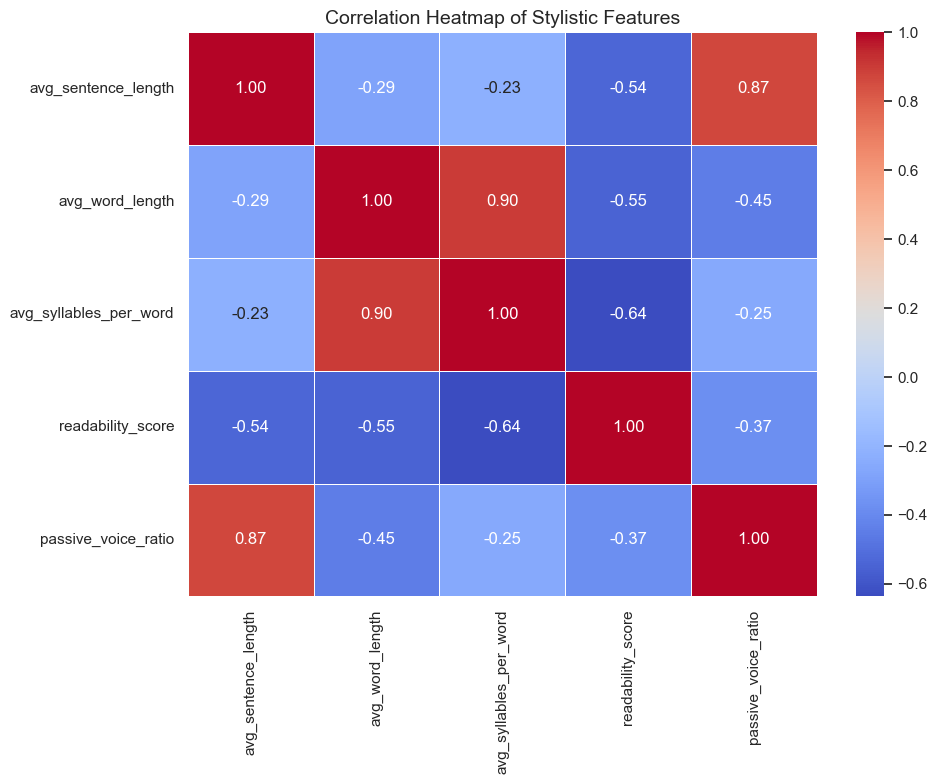

In [130]:
# Calculate the correlation matrix of stylistic features
corr_matrix = stylistic_features_df.drop(columns='cluster_label').corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Stylistic Features', fontsize=14)
plt.tight_layout()
plt.show()


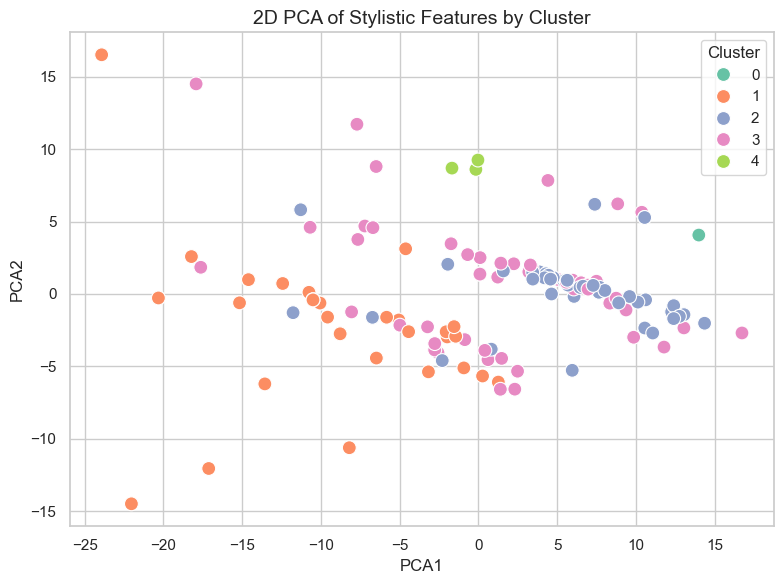

In [131]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Use PCA to reduce to 2 dimensions first for easier t-SNE visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(stylistic_features_df.drop(columns='cluster_label'))

# Alternatively, use t-SNE directly
# tsne = TSNE(n_components=2, random_state=42)
# tsne_result = tsne.fit_transform(stylistic_features_df.drop(columns='cluster_label'))

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = stylistic_features_df['cluster_label']

# Plot the 2D PCA result with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100, marker="o")
plt.title('2D PCA of Stylistic Features by Cluster', fontsize=14)
plt.tight_layout()
plt.show()
